# Statistics

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import csv
import math
import matplotlib.pyplot as plt
import requests
import sys

sys.path.append('/vagrant/data-science-from-scratch/code/')   # code from DSFS book's git repo cloned here
import working_with_data as wwd   # module from data science from scratch

## Obtain data

Let's obtain some data about restaurant bills.

In [3]:
url = 'https://raw.github.com/pandas-dev/pandas/master/pandas/tests/data/tips.csv'
lines = requests.get(url).text.split('\n')
reader = csv.DictReader(lines)
parsers = {'total_bill': float, 'tip': float, 'size': int}
data = [wwd.parse_dict(row, parsers) for row in reader]
data[0].keys()

['tip', 'smoker', 'sex', 'total_bill', 'time', 'day', 'size']

## Standard deviation

Variance of $x$ is $\frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2$  where $\bar{x} = \sum_{i=1}^n x_i / n$.  Standard deviation is the square root of the variance.

In [4]:
# copied from DSFS statistics.py
from linear_algebra import sum_of_squares

def mean(x): 
    return sum(x) / len(x)

def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)
    
def standard_deviation(x):
    return math.sqrt(variance(x))

In [5]:
total_bill = wwd.pluck('total_bill', data)
print "Mean restaurant bill", mean(total_bill)
print "Std deviation restaurant bill", standard_deviation(total_bill)

Mean restaurant bill 19.785942623
Std deviation restaurant bill 8.90241195486


## Box-and-whisker plot

By default, whiskers go to 5th and 95th percentile.  Outliers drawn as ticks.


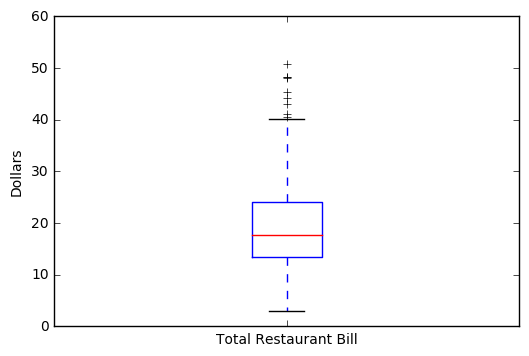

In [6]:
total_bill = wwd.pluck('total_bill', data)
plt.boxplot(total_bill, labels=['Total Restaurant Bill'])
plt.ylabel('Dollars')
print "By default, whiskers go to 5th and 95th percentile.  Outliers drawn as ticks."

## Covariance

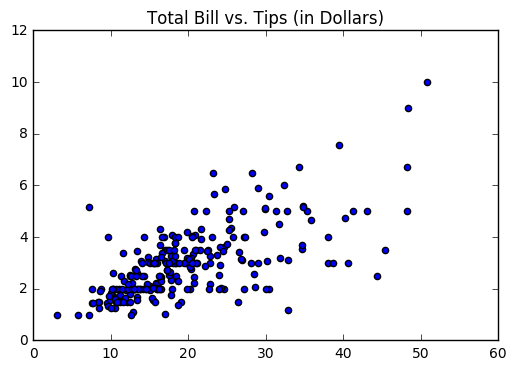

In [7]:
total_bill = wwd.pluck('total_bill', data)
tips = wwd.pluck('tip', data)
plt.scatter(total_bill, tips)
plt.title('Total Bill vs. Tips (in Dollars)')

Covariance of $x$ and $y$ is $cov(x,y) = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y})$.  

In [8]:
from linear_algebra import dot
from statistics import de_mean, standard_deviation

# copied from DSFS statistics module
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

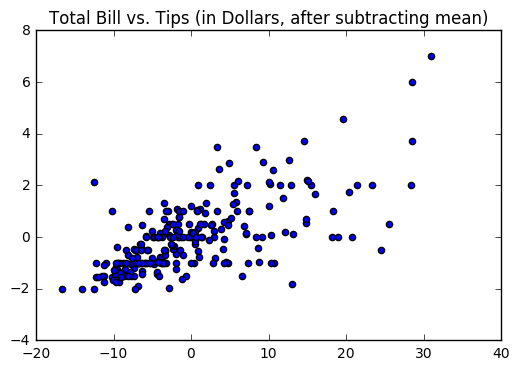

In [9]:
total_bill = wwd.pluck('total_bill', data)
tips = wwd.pluck('tip', data)
plt.scatter(de_mean(total_bill), de_mean(tips))
plt.title('Total Bill vs. Tips (in Dollars, after subtracting mean)')

In [10]:
print "Covariance(total_bill, tips) =", covariance(total_bill, tips)

Covariance(total_bill, tips) = 8.32350162922


## Problem with covariance

Problem: covariance is sensitive to the units of measurement.  Here's an illustration:

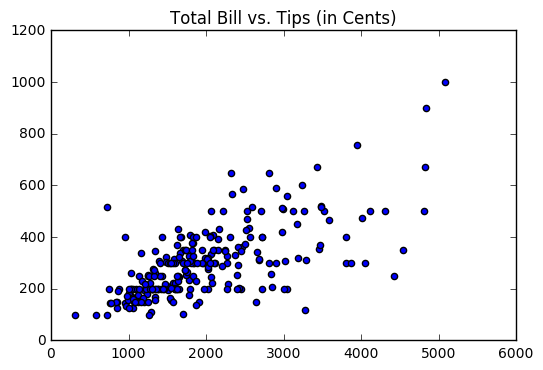

In [11]:
total_bill_cents = [bill * 100 for bill in total_bill]
tips_cents = [tip * 100 for tip in tips]
plt.scatter(total_bill_cents, tips_cents)
plt.title('Total Bill vs. Tips (in Cents)')

In [12]:
print "Covariance is sensitive to units of measurement"
print "Covariance(total_bill, tips) =", covariance(total_bill, tips)
print "Covariance(total_bill_cents, tips_cents) =", covariance(total_bill_cents, tips_cents)

Covariance is sensitive to units of measurement
Covariance(total_bill, tips) = 8.32350162922
Covariance(total_bill_cents, tips_cents) = 83235.0162922


## Correlation

Correlation of $x$ and $y$ is $corr(x,y) = cov(x,y) / (s_x \times s_y)$ where $s_x$ is the standard deviation of $x$.

Another interpretation of correlation is that it is simply covariance on *rescaled* data.  


In [13]:
def rescale(x):
    """Normalize data by subracting mean and dividing by standard deviation."""
    stdev = standard_deviation(x)
    if stdev > 0:
        return [x_i / stdev for x_i in de_mean(x)]
    else:
        return [x_i for x_i in de_mean(x)]

def correlation(x, y):
    return covariance(rescale(x), rescale(y))

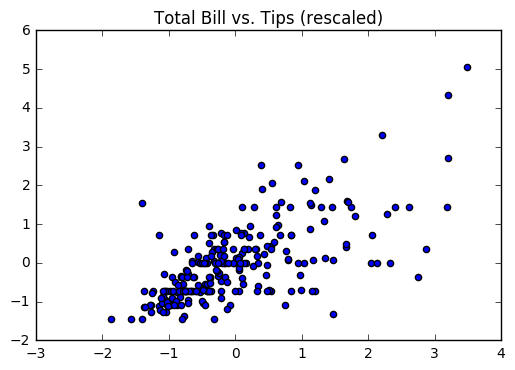

In [14]:
plt.scatter(rescale(total_bill), rescale(tips))
plt.title('Total Bill vs. Tips (rescaled)')

Because data is rescaled, correlation is insensitive to units of measurement.  Correlation is always a number between -1 and 1.

In [15]:
print "Correlation(total_bill, tips) =", correlation(total_bill, tips)
print "Correlation(total_bill_cents, tips_cents) =", correlation(total_bill_cents, tips_cents)

Correlation(total_bill, tips) = 0.675734109211
Correlation(total_bill_cents, tips_cents) = 0.675734109211


## Correlation and non-linear relationships

Correlation is a measure of a *linear* relationship.  Correlation of zero does not imply that there is *no* relationship.  X and Y may vary with each other but in a non-linear way.



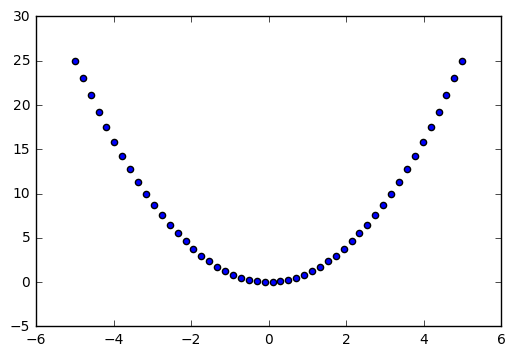

In [16]:
import numpy as np
xs = np.linspace(-5, 5)   # same idea as your code on lab1
ys = [x**2 for x in xs]
n = len(xs)
plt.scatter(xs, ys)

In [17]:
print "Correlation of all the data: ", round(correlation(xs, ys), 4)
print "Correlation of first half of data: ", round(correlation(xs[:n/2], ys[:n/2]), 4)
print "Correlation of second half of data: ", round(correlation(xs[n/2:], ys[n/2:]), 4)

Correlation of all the data:  0.0
Correlation of first half of data:  -0.9684
Correlation of second half of data:  0.9684
